In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
import random
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = tf.keras.datasets.fashion_mnist

In [5]:
dir(df)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [6]:
data = df.load_data

In [7]:
data

<function keras.src.datasets.fashion_mnist.load_data()>

In [8]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

In [11]:
xtrain = xtrain.reshape((xtrain.shape[0],28,28,1))
x_train = xtrain.astype('float32')/255.0
xtest = xtest.reshape((xtest.shape[0],28,28,1))
x_test = xtest.astype('float32')/255.0

In [12]:
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

In [13]:
class_names = ['Tshit/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot']

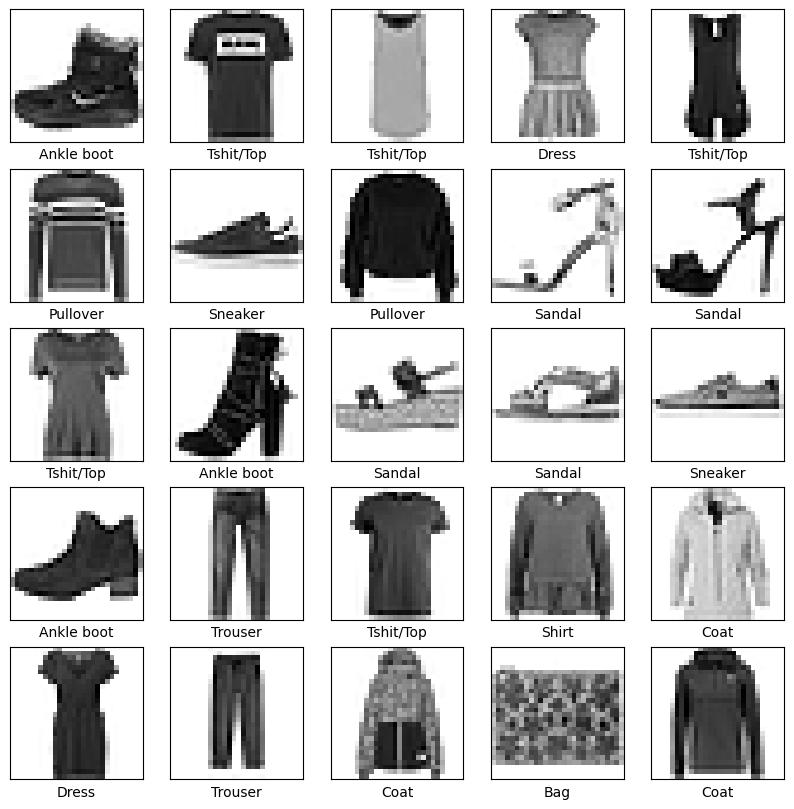

In [16]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28), cmap = plt.cm.binary)
    labelIdx = np.argmax(y_train[i])
    plt.xlabel(class_names[labelIdx])
plt.show()

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0

In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 32, epochs = 10)

Epoch 1/10


1875/1875 [==============================] - 142s 73ms/step - loss: 0.3838 - accuracy: 0.8674 - val_loss: 0.2543 - val_accuracy: 0.9055
Epoch 2/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2602 - accuracy: 0.9077 - val_loss: 0.2420 - val_accuracy: 0.9082
Epoch 3/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.2218 - accuracy: 0.9209 - val_loss: 0.2277 - val_accuracy: 0.9152
Epoch 4/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.1964 - accuracy: 0.9291 - val_loss: 0.2084 - val_accuracy: 0.9259
Epoch 5/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.1730 - accuracy: 0.9380 - val_loss: 0.1970 - val_accuracy: 0.9285
Epoch 6/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.1501 - accuracy: 0.9449 - val_loss: 0.1943 - val_accuracy: 0.9324
Epoch 7/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.1336 - accuracy: 0.9522 - val_loss:

In [21]:
predictions = model.predict(x_test)
predictions = tf.argmax(predictions, axis=1).numpy()
TestY = tf.argmax(y_test, axis=1).numpy()

313/313 [==============================] - 7s 23ms/step


In [22]:
print(metrics.classification_report(TestY, predictions, target_names=class_names))

              precision    recall  f1-score   support

   Tshit/Top       0.88      0.88      0.88      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.89      0.91      0.90      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.91      0.88      0.90      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.80      0.80      0.80      1000
     Sneaker       0.97      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



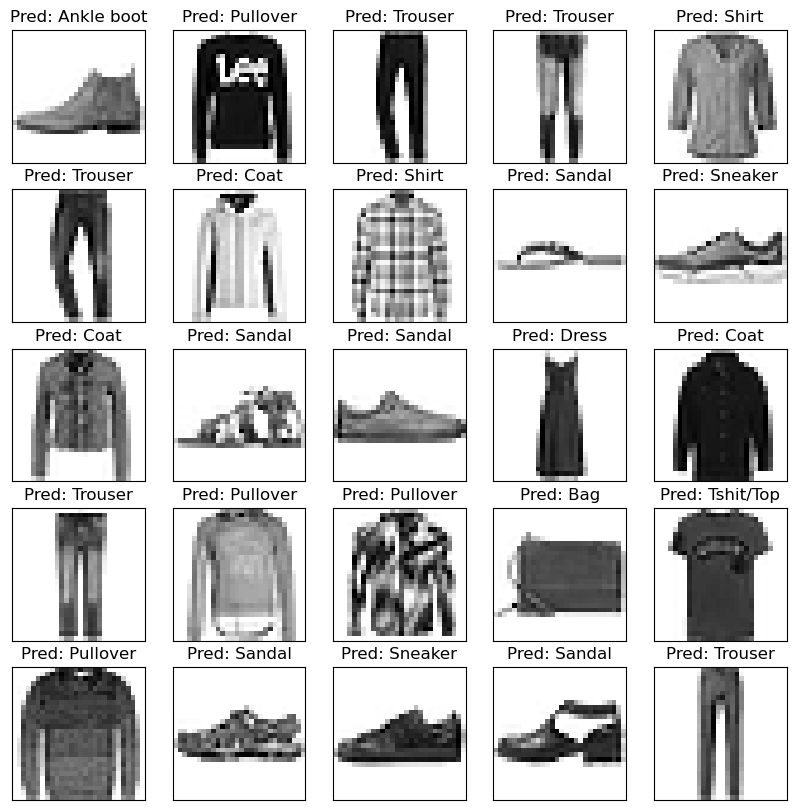

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28,28), cmap = plt.cm.binary)
    plt.title(f'Pred: {class_names[predictions[i]]}')
plt.show()